In [1]:
# Import Dependencies
import os
import csv
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from fractions import Fraction
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# 'big_songs_df.csv' is the one that Greg ran, with the full working data inc. funky unicode names
csvpath = os.path.join('..', 'code_output', 'big_songs_df.csv')

# Import the *_df.csv file as a DataFrame
df_music = pd.read_csv(csvpath, encoding="ISO-8859-1")

print(df_music.head())
print(len(df_music))

   Unnamed: 0  Number of Songs             Artist Name Artist Location  \
0           0                1                RaphaÃ«l          France   
1           1                1           Julie Zenatti             NaN   
2           2                1   The Baltimore Consort             NaN   
3           3                1            I Hate Sally             NaN   
4           4                1  Orlando Pops Orchestra             NaN   

    Duration                                  Title  \
0  148.74077         Je Sais Que La Terre Est Plate   
1  252.99546                              On Efface   
2   78.02730                        Howells Delight   
3  163.63057                          Martha Served   
4  199.99302  Zip-A-Dee-Doo-Dah (Song of the South)   

                                           Release  Year  Danceability  \
0          Je Sais Que La Terre Est Plate (Deluxe)  2008           0.0   
1                                       Comme Vous  2004           0.0   
2 

In [2]:
df_filtered = df_music[df_music['Hotness'].notnull()]
hotness1 = df_filtered['Hotness']
indexNames = df_filtered[df_filtered['Hotness'] == 0].index
df_filtered.drop(indexNames , inplace=True)
df_filtered

D:\Anaconda\envs\PythonData\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Unnamed: 0,Number of Songs,Artist Name,Artist Location,Duration,Title,Release,Year,Danceability,Energy,Mode,Tempo,Loudness,Hotness
0,0,1,RaphaÃ«l,France,148.74077,Je Sais Que La Terre Est Plate,Je Sais Que La Terre Est Plate (Deluxe),2008,0.0,0.0,1,124.059,-9.636,0.547953
1,1,1,Julie Zenatti,NaN,252.99546,On Efface,Comme Vous,2004,0.0,0.0,0,80.084,-11.061,0.475638
5,5,1,Brand X,"Sikeston, MO",279.35302,Liquid Time (composition by John Goodsall),X Communication : Trilogy II,0,0.0,0.0,1,99.024,-12.474,0.445455
6,6,1,Amorphis,NaN,255.03302,Misery Path (From the Privilege of Evil),Karelian Isthmus,0,0.0,0.0,1,175.673,-4.393,0.327737
8,8,1,Dead Kennedys,NaN,216.84200,Halloween,Milking The Sacred Cow,1982,0.0,0.0,1,92.897,-4.264,0.788388
10,10,1,Atreyu,"Orange County, CA",218.90567,You Eclipsed By Me (Album Version),The Curse,2004,0.0,0.0,0,157.715,-4.707,0.681092
11,11,1,Mistress,Mass. - Boston,580.70159,Shovel,In Disgust We Trust,2005,0.0,0.0,1,146.331,-4.523,0.401487
12,12,1,Shadows Fall,"Boston, MA",283.48036,What Drives The Weak,The War Within,2004,0.0,0.0,0,84.992,-4.076,0.687874
13,13,1,Vanessa Daou,NaN,229.66812,Life Force,Joe Sent Me,0,0.0,0.0,1,79.960,-19.293,0.266955
14,14,1,Dave Brockie Experience,NaN,135.86240,The Dance Of Europe,Diarrhea Of A Madman,2001,0.0,0.0,0,99.959,-3.312,0.355286


In [3]:
df_total_filtered = df_music.dropna()

indexNames = df_total_filtered[df_total_filtered['Year'] == 0].index
df_total_filtered.drop(indexNames , inplace=True)

indexNames = df_total_filtered[df_total_filtered['Hotness'] == 0].index
df_total_filtered.drop(indexNames , inplace=True)

df_total_filtered

,Unnamed: 0,Number of Songs,Artist Name,Artist Location,Duration,Title,Release,Year,Danceability,Energy,Mode,Tempo,Loudness,Hotness
0,0,1,RaphaÃ«l,France,148.74077,Je Sais Que La Terre Est Plate,Je Sais Que La Terre Est Plate (Deluxe),2008,0.0,0.0,1,124.059,-9.636,0.547953
10,10,1,Atreyu,"Orange County, CA",218.90567,You Eclipsed By Me (Album Version),The Curse,2004,0.0,0.0,0,157.715,-4.707,0.681092
11,11,1,Mistress,Mass. - Boston,580.70159,Shovel,In Disgust We Trust,2005,0.0,0.0,1,146.331,-4.523,0.401487
12,12,1,Shadows Fall,"Boston, MA",283.48036,What Drives The Weak,The War Within,2004,0.0,0.0,0,84.992,-4.076,0.687874
17,17,1,Linkin Park,"Los Angeles, CA",208.95302,Crawling (Album Version),Hybrid Theory,2000,0.0,0.0,1,105.095,-6.052,0.872229
21,21,1,Phil Collins,"Chiswick, London, England",154.93179,I'm Not Moving,Face Value,1981,0.0,0.0,0,100.042,-15.433,0.596841
28,28,1,Back Door Slam,CANADA - Ontario,319.84281,Heavy On My Mind (Album Version),Roll Away,2007,0.0,0.0,0,92.971,-4.325,0.624834
30,30,1,Dave Hollister,LOWELL,258.16771,Calm Da Seas,Witness Protection,2008,0.0,0.0,1,117.936,-5.193,0.427447
41,41,1,Daddy Yankee,Puerto Rico,235.15383,A Lo Clasico,El Cartel: The Big Boss,2007,0.0,0.0,0,91.026,-4.130,0.487112
45,45,1,Masta Ace Incorporated,"Brooklyn, NY",295.15710,Ain't No Game,Sittin' On Chrome,1995,0.0,0.0,1,88.120,-7.687,0.567592


In [4]:
# Use numpy to create quartiles
hotness = df_total_filtered['Hotness']

q1 = np.percentile(hotness, 25)
q3 = np.percentile(hotness,75)
# Print the quartiles
print(f"Q1 is {q1}")
print(f"Q3 is {q3}")
# Calculate the interquartile range
iqr = (q3 - q1)
print("interquartile range:", iqr)
# Find lower boundary
# Q1 - 1.5 * IQR
lower_boundary = q1 - (1.5 * iqr)
print("lower boundary:", lower_boundary)
# Find upper boundary
# Q3 + 1.5 * IQR
upper_boundary = q3 + (1.5 * iqr)
print("upper boundary:", upper_boundary)
# Check for any lower outliers
lowcheck = hotness[hotness <= lower_boundary]
print(lowcheck)
# Check for any upper outliers
highcheck = hotness[hotness >= upper_boundary]
print(highcheck)

Q1 is 0.39200877147130697
Q3 is 0.6363108095721599
interquartile range: 0.24430203810085294
lower boundary: 0.025555714320027567
upper boundary: 1.0027638667234393
Series([], Name: Hotness, dtype: float64)
Series([], Name: Hotness, dtype: float64)


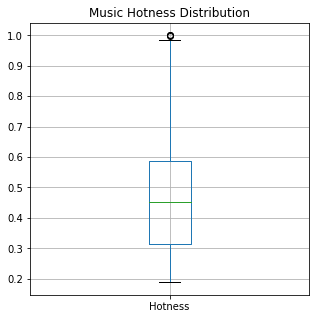

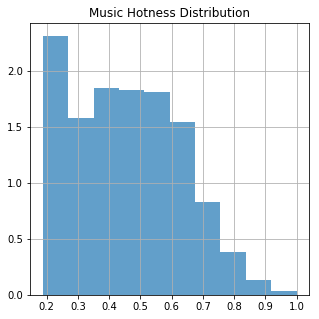

In [5]:
# Create a boxplot to compare areas
hotbox = df_filtered.boxplot("Hotness", figsize=(5, 5))
plt.title('Music Hotness Distribution')

hothist = df_filtered.hist("Hotness", density=True, alpha=.7, figsize=(5,5))
plt.title('Music Hotness Distribution')
plt.show()

In [6]:
# function to plot multiple similar things. NOTE THE x,y SWITCHES TO y,x since I was too lazy to switch hotness, x to x, hotness
def plotting(x,y):
    df_total_filtered.plot.scatter(y, x, s=5, figsize=(5, 5))

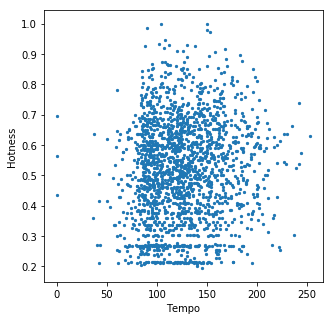

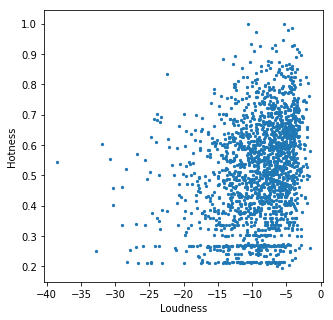

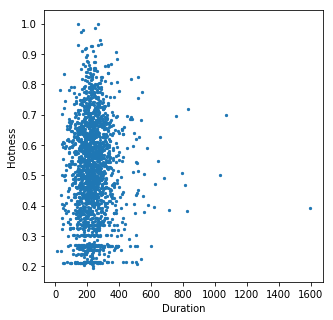

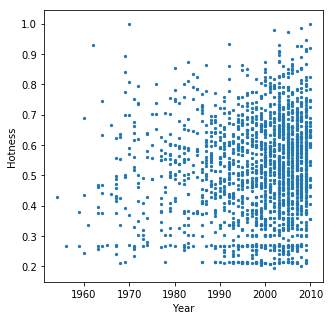

In [7]:
plotting("Hotness", "Tempo")
plotting("Hotness", "Loudness")
plotting("Hotness", "Duration")
plotting("Hotness", "Year")

In [8]:
# define the data/predictors as the pre-set feature names  
#df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
#target = pd.DataFrame(data.target, columns=["MEDV"])

In [9]:
## Without a constant

import statsmodels.api as sm

y = df_filtered["Tempo"]
X = df_filtered["Hotness"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Tempo   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                 2.060e+04
Date:                Fri, 14 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:25:37   Log-Likelihood:                -22731.
No. Observations:                4214   AIC:                         4.546e+04
Df Residuals:                    4213   BIC:                         4.547e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Hotness      240.7047      1.677    143.527      0.000     237.417     243.993
==============================================================================
Omnibus:                       11.474   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                9.241
Skew:                           0.011   Prob(JB):                      0.00985
Kurtosis:                       2.772   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
X = df_filtered[["Duration", "Tempo", "Loudness"]]
y = df_filtered["Hotness"]
model = sm.OLS(y, X).fit()
redictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Hotness   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     7798.
Date:                Fri, 14 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:25:37   Log-Likelihood:                 994.30
No. Observations:                4214   AIC:                            -1983.
Df Residuals:                    4211   BIC:                            -1964.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Duration       0.0005   2.49e-05     18.544      0.000       0.000       0.001
Tempo          0.0024   5.37e-05     44.940      0.000       0.002       0.003
Loudness      -0.0030      0.001     -5.867      0.000      -0.004      -0.002
==============================================================================
Omnibus:                       47.288   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.596
Skew:                           0.119   Prob(JB):                     3.07e-08
Kurtosis:                       2.625   Cond. No.                         50.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [12]:
predictions = lm.predict(X)
#lm.predict(218,92,-10)
tryme = pd.DataFrame(
    {"Duration": [200],
     "Tempo": [90],
     "Loudness": [-10]
     })

lm.predict(tryme)
predictions

array([0.45952839, 0.44079336, 0.43450229, ..., 0.38711566, 0.47771811,
       0.44950553])

In [13]:
df_filtered

,Unnamed: 0,Number of Songs,Artist Name,Artist Location,Duration,Title,Release,Year,Danceability,Energy,Mode,Tempo,Loudness,Hotness
0,0,1,RaphaÃ«l,France,148.74077,Je Sais Que La Terre Est Plate,Je Sais Que La Terre Est Plate (Deluxe),2008,0.0,0.0,1,124.059,-9.636,0.547953
1,1,1,Julie Zenatti,NaN,252.99546,On Efface,Comme Vous,2004,0.0,0.0,0,80.084,-11.061,0.475638
5,5,1,Brand X,"Sikeston, MO",279.35302,Liquid Time (composition by John Goodsall),X Communication : Trilogy II,0,0.0,0.0,1,99.024,-12.474,0.445455
6,6,1,Amorphis,NaN,255.03302,Misery Path (From the Privilege of Evil),Karelian Isthmus,0,0.0,0.0,1,175.673,-4.393,0.327737
8,8,1,Dead Kennedys,NaN,216.84200,Halloween,Milking The Sacred Cow,1982,0.0,0.0,1,92.897,-4.264,0.788388
10,10,1,Atreyu,"Orange County, CA",218.90567,You Eclipsed By Me (Album Version),The Curse,2004,0.0,0.0,0,157.715,-4.707,0.681092
11,11,1,Mistress,Mass. - Boston,580.70159,Shovel,In Disgust We Trust,2005,0.0,0.0,1,146.331,-4.523,0.401487
12,12,1,Shadows Fall,"Boston, MA",283.48036,What Drives The Weak,The War Within,2004,0.0,0.0,0,84.992,-4.076,0.687874
13,13,1,Vanessa Daou,NaN,229.66812,Life Force,Joe Sent Me,0,0.0,0.0,1,79.960,-19.293,0.266955
14,14,1,Dave Brockie Experience,NaN,135.86240,The Dance Of Europe,Diarrhea Of A Madman,2001,0.0,0.0,0,99.959,-3.312,0.355286


In [14]:
df_predictions = df_filtered
df_predictions['Predicted Hotness'] = predictions
df_predictions.sort_values(['Hotness'], ascending = False)

D:\Anaconda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Unnamed: 0,Number of Songs,Artist Name,Artist Location,Duration,Title,Release,Year,Danceability,Energy,Mode,Tempo,Loudness,Hotness,Predicted Hotness
7546,7546,1,B.o.B,Washington DC,269.63546,Nothin' On You [feat. Bruno Mars] (Album Version),B.o.B Presents: The Adventures of Bobby Ray,2010,0.0,0.0,1,104.038,-5.388,1.000000,0.484026
8356,8356,1,Led Zeppelin,England,145.05751,Immigrant Song (Album Version),Led Zeppelin III,1970,0.0,0.0,1,150.569,-10.544,1.000000,0.458323
5881,5881,1,Donny Hathaway,"Chicago, IL",231.18322,This Christmas (LP Version),A Classic Soul Christmas,0,0.0,0.0,1,92.980,-9.647,0.997758,0.453048
8061,8061,1,Nickelback,"Hanna, Alberta, Canada",248.05832,If Today Was Your Last Day (Album Version),Dark Horse,2008,0.0,0.0,0,89.958,-4.157,0.984347,0.489953
2034,2034,1,Maroon 5,"Los Angeles, CA",173.66159,Harder To Breathe,Songs About Jane,2002,0.0,0.0,0,149.917,-4.757,0.979837,0.497627
8874,8874,1,The White Stripes,Nashville / Los Angeles,160.31302,Blue Orchid,Blue Orchid,2005,0.0,0.0,1,152.785,-9.385,0.972387,0.466571
6589,6589,1,Snow Patrol,"Dundee, Scotland",284.10730,Just Say Yes,Just Say Yes,2009,0.0,0.0,1,107.998,-5.519,0.945995,0.483776
7532,7532,1,Pete Rock & C.L. Smooth,"Mt. Vernon, NY",286.69342,They Reminisce Over You (Single Version),Mecca And The Soul Brother,1992,0.0,0.0,0,101.779,-10.235,0.932274,0.450300
5718,5718,1,Muse,UK,258.42893,Exogenesis: Symphony Part 1 [Overture],The Resistance,0,0.0,0.0,1,121.071,-8.895,0.931346,0.463295
9949,9949,1,The Mars Volta,"Long Beach, California",266.47465,Inertiatic Esp,Inertiatic Esp,2003,0.0,0.0,0,112.486,-3.952,0.928617,0.495468


In [15]:
df_predictions.sort_values(['Predicted Hotness'], ascending = False)

,Unnamed: 0,Number of Songs,Artist Name,Artist Location,Duration,Title,Release,Year,Danceability,Energy,Mode,Tempo,Loudness,Hotness,Predicted Hotness
9151,9151,1,Power Pill Fist,NaN,291.42159,Chuckanut Drive,Kongmanivong,2008,0.0,0.0,1,138.387,0.566,0.401487,0.531103
7867,7867,1,Call To Preserve,"Rockledge, Florida",44.30322,Hindsight,From Isolation,2008,0.0,0.0,0,208.167,-2.030,0.499665,0.528132
7750,7750,1,Silverstein,"Burlington, Ontario, Canada",208.16934,Defend You (Album Version),Discovering The Waterfront,2005,0.0,0.0,0,197.722,-2.140,0.823778,0.524301
4490,4490,1,Set Your Goals,"San Francisco, CA",204.40771,the fallen...,This Will Be The Death Of Us,2009,0.0,0.0,1,194.532,-2.192,0.718391,0.523371
1340,1340,1,Since The Flood,New Hampshire,117.08036,All For Nothing,No Compromise,2007,0.0,0.0,1,189.987,-2.191,0.537504,0.523116
1478,1478,1,Dinosaur Jr.,"Amherst, MA",220.70812,Been There All The Time,Been There All The Time,2007,0.0,0.0,1,253.357,-3.868,0.629213,0.522849
2225,2225,1,Embrace the End,NaN,247.48363,Intensity In Ten Cities,Ley Lines,2008,0.0,0.0,1,231.851,-3.402,0.547953,0.521813
4281,4281,1,Ensiferum,"Helsinki, Finland",218.61832,Hero In A Dream,Ensiferum,1999,0.0,0.0,0,200.061,-2.599,0.691043,0.521528
1616,1616,1,Call To Preserve,"Rockledge, Florida",175.22893,Hope For The Fallen,From Isolation,2008,0.0,0.0,0,158.018,-1.672,0.496796,0.520262
4567,4567,1,Less Than Jake,"Gainesville, FL",257.01832,Short On Ideas / One Last Cigarette,Pezcore,2002,0.0,0.0,1,170.412,-1.977,0.407233,0.519949
